# Machine Learning - Parte I - Regressão Linear

Vamos começar a falar sobre os algoritmos de machine learning, começando por um de regressão. <br>
Regressão linear é um algoritmo largamente utilizado, tendo já completado dois séculos de existência desde que sua primeira forma de utilização foi publicada no começo do século XIX.

Apesar de não ser o que conduz ao melhor modelo, daremos os primeiros passos para entender:

* métricas de desempenho de modelos, ou seja como comparar modelos
* estratégias de validação: separação entre treino e teste


Além disso, introduziremos uma notação comum a todos os algoritmos da seguinte maneira:

* $X$ : matriz de features
* $y$ : vetor com os objetivos da predição


# Regressão

<div class="span5 alert alert-info">

<p> Fornecidos $x$ and $y$, o objetivo da regressão linear é: </p>
<ul>
  <li> Criar um <b>modelo preditivo</b> para predizer o $y$ a partir de $x_i$</li>
  <li> Modelar a <b>importancia</b> entre cada variável dependente $x_i$ e $y$</li>
    <ul>
      <li> Nem todos os $x_i$ tem relação com $y$</li>
      <li> Quais $x_i$ que mais contribuem para determinar $y$? </li>
    </ul>
</ul>
</div>



### recap
***

[Regressão Linear](http://en.wikipedia.org/wiki/Linear_regression) é um metodo para modelar a relação entre um conjunto de variaveis independentes $x$ (explanatórias, features, preditores) e uma variável dependente $Y$.  Esse metodo assume que $x$ tem uma relação linear com $y$.  

$$ y = \beta_0 + \beta_1 x + \epsilon$$

one $\epsilon$ refere-se a um erro. 

* $\beta_0$ é a intercepto do modelo

* O objetivo será estimar os coeficientes (e.g. $\beta_0$ and $\beta_1$). Representamos as estimativas com o "chapeu" em cima da letra. 

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Uma vez obtido a estimativa dos coeficientes $\hat{\beta}_0$ and $\hat{\beta}_1$, podemos usar para predizer novos valores de $Y$

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Regressão Linear Multipla é quando há mais de uma variavel independente
    * $x_1$, $x_2$, $x_3$, $\ldots$

$$ y = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p + \epsilon$$ 

In [1]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Como encontrar os "melhores" $a$ e $b$?

**Metodo dos minimos quadrados (least squares method)**


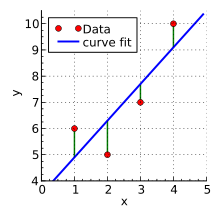

In [27]:
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Pergunta: qual a melhor linha azul que representa o conjunto de pontos vermelhos? <br>
Resposta: a que minimiza a soma dos quadrados das linhas verdes (o erro)

\begin{equation*}
MSE\quad = \frac { 1 }{ n } \sum _{ i=0 }^{ n-1 }{ { { (\hat { { y }^{ (i) } }  } }-{ y }^{ (i) })^{ 2 } }   \quad 
\end{equation*}

\begin{equation*}
RMSE\quad = \sqrt { \frac { 1 }{ n } \sum _{ i\quad =\quad 0 }^{ n-1 }{ { { (\hat { { y }^{ (i) } }  } }-{ y }^{ (i) })^{ 2 } }   } \quad  
\end{equation*}

#### agora com multiplas variáveis

Notação:

$x^{(0)}_{CRIM} = 0.00632$

$x^{(0)}_{ZN} = 18.00000$

$x^{(0)}_{LSTAT} = 4.98$

$y^{(0)} = 24$

A principal "jogada" da regressão linear é considerar que cada feature contribui linearmente na composição do preço:

$\hat{y^{(i)}} = a_{CRIM}.x^{(i)}_{CRIM} + a_{ZN}.x^{(i)}_{ZN} + ... + a_{LSTAT}.x^{(i)}_{LSTAT} + b$, <br>

para $i = 0, 1, 2,..., n-1$ 

e o objetivo será encontrar $a_{CRIM}, a_{ZN}, ...,a_{LSTAT}, b$ que minimizam o erro 

Numa forma matricial, podemos re-escrever o problema da seguinte maneira:


\begin{equation*}
\mathbf{X}.\mathbf{a} = \hat{\mathbf{y}}
\end{equation*}

<br>


\begin{equation*}
\mathbf{X} =  \begin{bmatrix}
x^{(0)}_{CRIM} & x^{(0)}_{ZN} & ... & x^{(0)}_{LSTAT} & 1 \\
x^{(1)}_{CRIM} & x^{(1)}_{ZN} & ... & x^{(1)}_{LSTAT} & 1 \\
... & ... & ... & ...\\
x^{(n-1)}_{CRIM} & x^{(n-1)}_{ZN} & ... & x^{(n-1)}_{LSTAT} & 1 \\
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\mathbf{a} =  \begin{bmatrix}
a_{CRIM} \\
a_{ZN} \\
... \\
a_{LSTAT}\\
b \\
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\mathbf{y} =  \begin{bmatrix}
\hat{y^{(0)}} \\
\hat{y^{(1)}} \\
... \\
\hat{y^{(n-1)}}\\
\end{bmatrix}
\end{equation*}

### Com todas as features - com sklearn

Funções utilizadas:

* `lreg.fit()` : para treinar o modelo

* `lreg.predict()` : predição do valor, segundo um modelo treinado

* `lreg.score()` : retorna o coeficiente de determinação (R^2), uma medida de quão bem o modelo captura as observações. 

## Treinamento e Validação

### Objetivo de separar os dados em treinamento e teste

<div class="span5 alert alert-info">

<p> No exemplo acima: </p>
<ul>
  <li> Treinamos e testamos na mesma base </li>
  <li> É esperado que as predições sobre essa base sejam boas, mas e quanto a novos dados? </li>
  <li> Uma solução seria repartir dados, e <b>treinar</b> numa parte dos dados 
      reservando uma parte para <b>teste</b>  </li>
  <li> isso se chama validação </li>  
</ul>
</div>

In [53]:
from sklearn.model_selection import train_test_split

In [64]:
# Repartindo o dados em treinamento e validação
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      random_state = 999)

#### Predição de preços

### Referencias

* Link para os modulos de machine learning: [SciKit Learn](http://scikit-learn.org/stable/)
* Curso Machine Learning Andrew Ng: [Coursera](https://www.coursera.org/learn/machine-learning)
* Curso Data Analysis Jose Portilla: [Udemy](https://www.udemy.com/learning-python-for-data-analysis-and-visualization/learn/v4/t/lecture/2338236?start=0)
* Curso CS109 Harvard: [Harvard](http://cs109.github.io/2015)